In [7]:
import laspy
import pandas as pd
import matplotlib.pyplot as plt
from util import las_to_pc, sexy_gif, rot_m


In [112]:
dataDir = 'MpalaForestGEO_LasClippedtoTreePolygons'
metadata = pd.read_csv('labels.csv')
results = []
for id, label in zip(metadata['tree_id'].to_list(), metadata['label'].to_list()):
    try:
        las = laspy.read(f'{dataDir}/treeID_{id}.las')
        results.append((id, len(las.classification), label))
    except:
        continue
results.sort(key=lambda x: x[1], reverse=True)
results

[(16338, 39658, 'Acacia drepanolobium'),
 (12983, 38752, 'Acacia drepanolobium'),
 (13215, 37812, 'Acacia drepanolobium'),
 (13838, 37408, 'Acacia drepanolobium'),
 (13732, 23668, 'Acacia brevispica'),
 (5589, 22413, 'Croton dichogamous'),
 (7904, 22176, 'Acacia gerrardii'),
 (12545, 19708, 'Croton dichogamous'),
 (16487, 19578, 'Euclea divinorum'),
 (8255, 19530, 'Acacia mellifera'),
 (13398, 18814, 'Acacia drepanolobium'),
 (16236, 18708, 'Scutia myrtina'),
 (15120, 18686, 'Acacia brevispica'),
 (12815, 18405, 'Acacia brevispica'),
 (13093, 18008, 'Acacia drepanolobium'),
 (6559, 17730, 'Euclea divinorum'),
 (13481, 17536, 'Boscia angustifolia'),
 (13185, 16756, 'Acacia drepanolobium'),
 (15930, 16577, 'Euclea divinorum'),
 (4205, 16397, 'Croton dichogamous'),
 (13749, 15645, 'Acacia drepanolobium'),
 (9666, 14300, 'Acacia gerrardii'),
 (10466, 13844, 'Acacia drepanolobium'),
 (3965, 13123, 'Croton dichogamous'),
 (14976, 12787, 'Acacia brevispica'),
 (14536, 12629, 'Acacia mellifera

- Acacia drepanolobium: 16338
- Euclea divinorum: 6559


- sparse: 5302, 5021, 2537

- multiple trees: 16338, 4205, 6559

- This species but bad cropping: 13093, 13481, 13749

- Big ball of hair: 8255, 9666, 15930

- Landscape is bad: 16236, 15120, 14976

In [ ]:
las = laspy.read(f'{dataDir}/treeID_{14976}.las')
pc, _ = las_to_pc(las)

sexy_gif(pc, 'delete.gif')

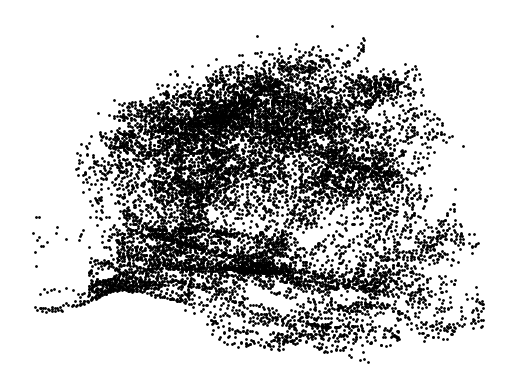

Acacia brevispica
12787


In [139]:
# parameters
trees = [14976]

for id in trees:
    try:
        # load tree as pointcloud
        las = laspy.read(f'{dataDir}/treeID_{id}.las')
        pc, _ = las_to_pc(las)

        # create flat image
        pc @= rot_m(0, -90, 0)
        pc -= pc.mean(dim=0)
        pc /= pc.norm(dim=-1).max()
        plt.axis('off')
        plt.scatter(pc[:,1], pc[:,0], c='k', s=1)
        plt.show()
        print(metadata[metadata['tree_id'] == id]['label'].item())
        print(len(las.classification))
    except Exception as e:
        print(f'Something went wrong with tree {id}: {e}')
        continue

In [21]:
metadata[['tree_id', 'label']]

      tree_id                      label
0        6147          Acacia brevispica
1        5539          Acacia brevispica
2        5540          Acacia brevispica
3        5340          Acacia brevispica
4        4908          Acacia brevispica
...       ...                        ...
3939     2955         Turraea mombassana
3940     8033         Turraea mombassana
3941     5768  Unidentified Unidentified
3942     5844  Unidentified Unidentified
3943     5870  Unidentified Unidentified

[3944 rows x 2 columns]
